In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:

df = pd.read_csv('/content/sentiment_data.csv')
df.head()


,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2


In [4]:
df.columns

Index(['Unnamed: 0', 'Comment', 'Sentiment'], dtype='object')

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'\@w+|\#','', text)  # remove mentions & hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove special characters/numbers
    text = text.strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['Comment'].apply(clean_text)
df.head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Comment,Sentiment,clean_text
0,0,lets forget apple pay required brand new iphon...,1,lets forget apple pay required brand new iphon...
1,1,nz retailers don’t even contactless credit car...,0,nz retailers dont even contactless credit card...
2,2,forever acknowledge channel help lessons ideas...,2,forever acknowledge channel help lessons ideas...
3,3,whenever go place doesn’t take apple pay doesn...,0,whenever go place doesnt take apple pay doesnt...
4,4,apple pay convenient secure easy use used kore...,2,apple pay convenient secure easy use used kore...


In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['Sentiment']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7851292790644633
Confusion Matrix:
 [[ 7196  2208  1685]
 [  968 13683  1851]
 [ 1018  2633 16987]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.65      0.71     11089
           1       0.74      0.83      0.78     16502
           2       0.83      0.82      0.83     20638

    accuracy                           0.79     48229
   macro avg       0.78      0.77      0.77     48229
weighted avg       0.79      0.79      0.78     48229



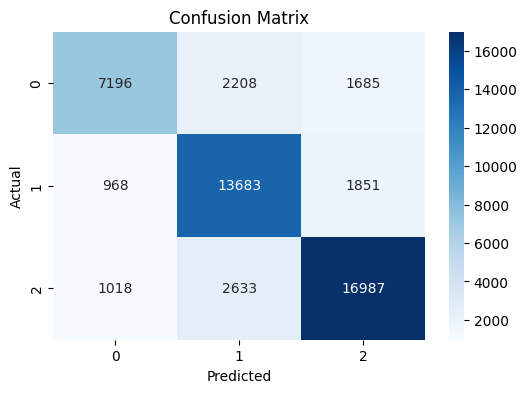

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
from wordcloud import WordCloud

# Positive sentiment words
positive_words = " ".join(df[df['Sentiment'] == 'positive']['clean_text'])

# Negative sentiment words
negative_words = " ".join(df[df['Sentiment'] == 'negative']['clean_text'])

# WordCloud for Positive
wordcloud = WordCloud(width=800, height=400).generate(positive_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Comments WordCloud")
plt.axis('off')
plt.show()

# WordCloud for Negative
wordcloud = WordCloud(width=800, height=400).generate(negative_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative Comments WordCloud")
plt.axis('off')
plt.show()


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [14]:
df['Sentiment'].unique()
# Map numerical sentiment to text labels
df['Sentiment'] = df['Sentiment'].map({0: 'negative', 1: 'positive', 2: 'neutral'})


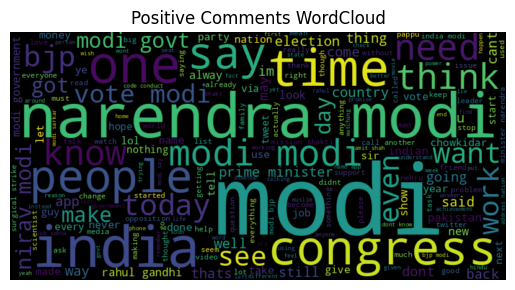

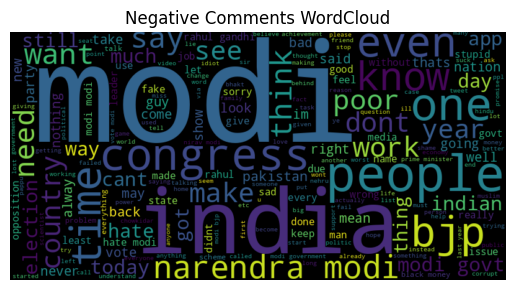

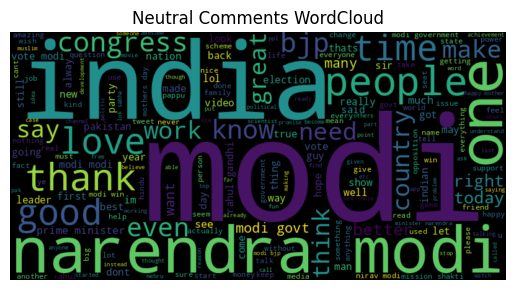

In [15]:
from wordcloud import WordCloud

# Positive words
positive_words = " ".join(df[df['Sentiment'] == 'positive']['clean_text'])

# Negative words
negative_words = " ".join(df[df['Sentiment'] == 'negative']['clean_text'])

# Neutral words (optional)
neutral_words = " ".join(df[df['Sentiment'] == 'neutral']['clean_text'])

# Plot positive
if positive_words.strip():
    wordcloud = WordCloud(width=800, height=400).generate(positive_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Positive Comments WordCloud")
    plt.axis('off')
    plt.show()
else:
    print("No positive words to show.")

# Plot negative
if negative_words.strip():
    wordcloud = WordCloud(width=800, height=400).generate(negative_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Negative Comments WordCloud")
    plt.axis('off')
    plt.show()
else:
    print("No negative words to show.")

# Plot neutral
if neutral_words.strip():
    wordcloud = WordCloud(width=800, height=400).generate(neutral_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Neutral Comments WordCloud")
    plt.axis('off')
    plt.show()
else:
    print("No neutral words to show.")


/tmp/ipython-input-16-3205199458.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


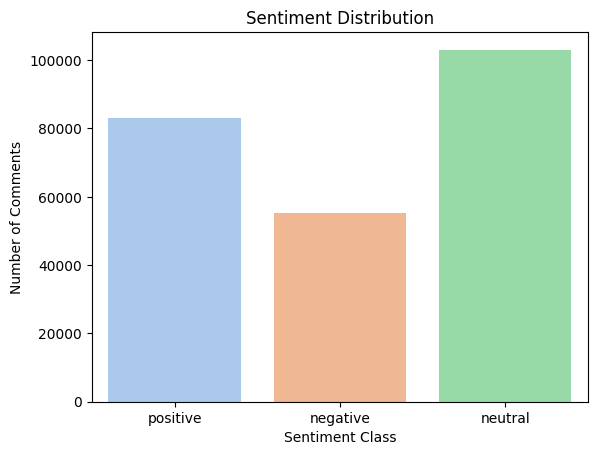

In [16]:
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Comments")
plt.show()


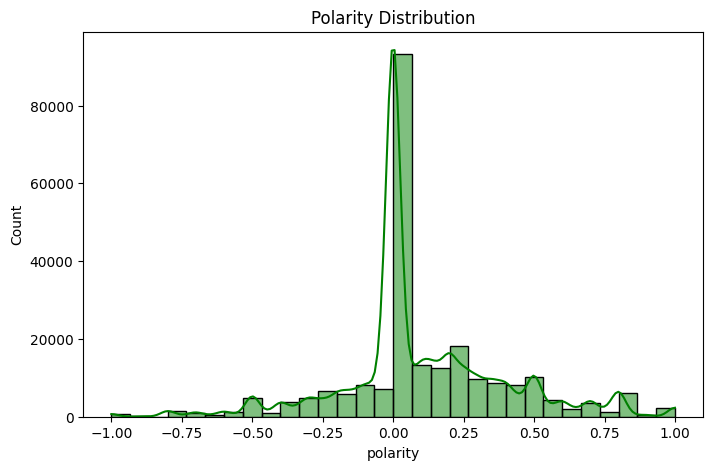

In [17]:
from textblob import TextBlob

df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

plt.figure(figsize=(8,5))
sns.histplot(df['polarity'], bins=30, kde=True, color='green')
plt.title("Polarity Distribution")
plt.show()


In [18]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Naive Bayes Accuracy: 0.6657405295569055


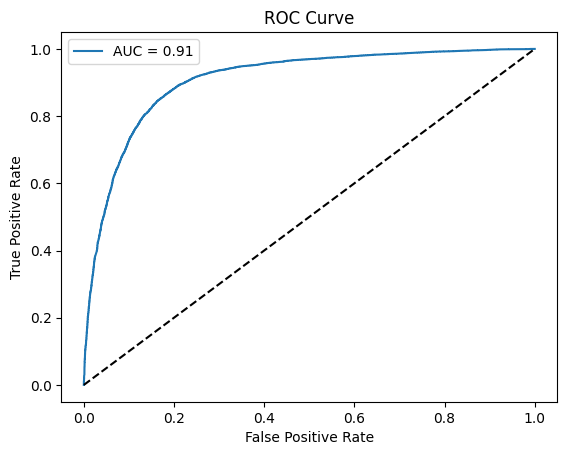

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Convert labels to binary (0 = negative, 1 = positive)
binary_df = df[df['Sentiment'].isin(['positive', 'negative'])]
X_bin = vectorizer.fit_transform(binary_df['clean_text'])
y_bin = binary_df['Sentiment'].map({'negative': 0, 'positive': 1})

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2)

model_bin = LogisticRegression()
model_bin.fit(X_train_bin, y_train_bin)
y_prob = model_bin.predict_proba(X_test_bin)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob)
auc = roc_auc_score(y_test_bin, y_prob)

plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
